# Exploratory Data Analysis (EDA) - CIFAR-10

This notebook explores the CIFAR-10 dataset prepared in ImageFolder format.

Goals:
- Verify dataset structure
- Inspect class distribution
- Visualize sample images
- Compute mean and standard deviation for normalization


In [3]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
from collections import Counter


## Load Dataset

We load the dataset using `ImageFolder` from the processed directory.


In [4]:
train_dataset = ImageFolder("../data/processed/train")
test_dataset = ImageFolder("../data/processed/test")


len(train_dataset), len(test_dataset)


(50000, 10000)

In [15]:
img = train_dataset[0]
print(type(img))
print(type(train_dataset))


<class 'tuple'>
<class 'torchvision.datasets.folder.ImageFolder'>


In [17]:
for i in range(3):
    img, label = train_dataset[i]
    print(img, label)

<PIL.Image.Image image mode=RGB size=32x32 at 0x18AB0057410> 0
<PIL.Image.Image image mode=RGB size=32x32 at 0x18AB00EF090> 0
<PIL.Image.Image image mode=RGB size=32x32 at 0x18AB00EE010> 0


## Class Names

CIFAR-10 contains 10 classes.


In [5]:
class_names = train_dataset.classes
class_names


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

## Class Distribution

We verify whether the dataset is balanced.


In [18]:
labels = [label for _, label in train_dataset]
counts = Counter(labels)

for idx, count in counts.items():
    print(f"{class_names[idx]}: {count}")


airplane: 5000
automobile: 5000
bird: 5000
cat: 5000
deer: 5000
dog: 5000
frog: 5000
horse: 5000
ship: 5000
truck: 5000


The dataset is perfectly balanced across all 10 classes.


## Sample Images

We visualize random samples from the training set.


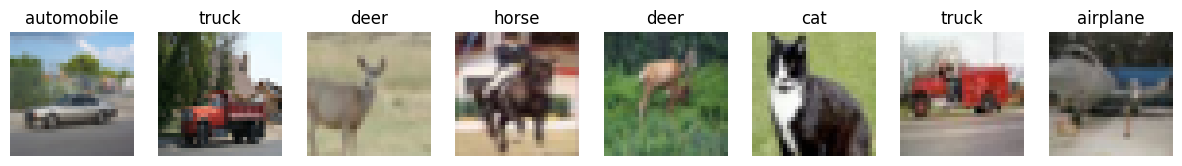

In [19]:
def show_images(dataset, n=8):
    fig, axes = plt.subplots(1, n, figsize=(15, 3))
    for i in range(n):
        img, label = dataset[random.randint(0, len(dataset)-1)]
        axes[i].imshow(img)
        axes[i].set_title(class_names[label])
        axes[i].axis("off")
    plt.show()

show_images(train_dataset)


## Image Dimensions

We verify image shape.


In [20]:
img, label = train_dataset[0]
np.array(img).shape


(32, 32, 3)

## Compute Mean and Standard Deviation

These values will be used for normalization during training.


In [ ]:
transform = transforms.ToTensor()
train_dataset_tensor = ImageFolder("data/processed/train", transform=transform)

loader = DataLoader(train_dataset_tensor, batch_size=512, shuffle=False)

mean = 0.
std = 0.
total_images = 0

for images, _ in loader:
    batch_samples = images.size(0)
    images = images.view(batch_samples, images.size(1), -1)
    
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)
    total_images += batch_samples

mean /= total_images
std /= total_images

mean, std
